<a href="https://colab.research.google.com/github/acaicomdados/analise-barragens/blob/main/Notebook%20feito%20nos%20encontros/Extras/analise_de_text0_04_05_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as blibiotecas que serão utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
noticias_barragem = pd.read_csv('Noticias barragens de mineração.csv')
noticias_barragem.drop(['Unnamed: 0','Termo utilizado'],axis=1,
                       inplace=True)
noticias_barragem.head()

,Titulo,Data de Publicação,Link,Canal
0,MG tem 400 minas abandonadas e especialistas f...,"Tue, 30 Apr 2024 03:01:59 GMT",https://news.google.com/rss/articles/CBMihgFod...,Correio do Povo
1,Operação integrada do Governo de Minas promove...,"Mon, 29 Apr 2024 20:30:00 GMT",https://news.google.com/rss/articles/CBMigQFod...,Agência Minas Gerais
2,Agência de mineração interdita barragem de rej...,"Mon, 13 Nov 2023 08:00:00 GMT",https://news.google.com/rss/articles/CBMibWh0d...,Poder360
3,MAB ocupa entrada da mineradora Vale em Vitóri...,"Wed, 13 Mar 2024 07:00:00 GMT",https://news.google.com/rss/articles/CBMilAFod...,Brasil de Fato
4,Comissão de Fiscalização de Barragens apresent...,"Mon, 18 Dec 2023 08:00:00 GMT",https://news.google.com/rss/articles/CBMiWmh0d...,Portal da Câmara dos Deputados


Text(0, 0.5, 'Portal de Noticia')

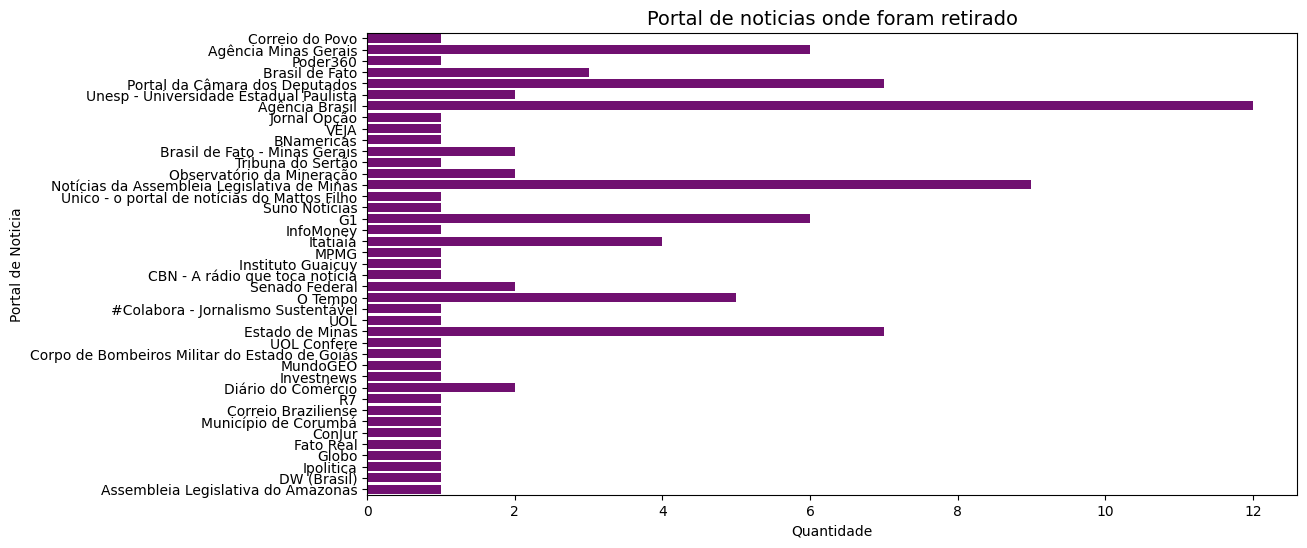

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Portal de noticias onde foram retirado',
          fontsize=14)
sns.countplot(y='Canal',data=noticias_barragem,color='purple')
plt.xlabel('Quantidade')
plt.ylabel('Portal de Noticia')

In [ ]:
noticias_barragem['Titulo'] = noticias_barragem['Titulo'].str.lower()
noticias_barragem.head()

,Titulo,Data de Publicação,Link,Canal
0,mg tem 400 minas abandonadas e especialistas f...,"Tue, 30 Apr 2024 03:01:59 GMT",https://news.google.com/rss/articles/CBMihgFod...,Correio do Povo
1,operação integrada do governo de minas promove...,"Mon, 29 Apr 2024 20:30:00 GMT",https://news.google.com/rss/articles/CBMigQFod...,Agência Minas Gerais
2,agência de mineração interdita barragem de rej...,"Mon, 13 Nov 2023 08:00:00 GMT",https://news.google.com/rss/articles/CBMibWh0d...,Poder360
3,mab ocupa entrada da mineradora vale em vitóri...,"Wed, 13 Mar 2024 07:00:00 GMT",https://news.google.com/rss/articles/CBMilAFod...,Brasil de Fato
4,comissão de fiscalização de barragens apresent...,"Mon, 18 Dec 2023 08:00:00 GMT",https://news.google.com/rss/articles/CBMiWmh0d...,Portal da Câmara dos Deputados


In [ ]:
def remover_stopwords(texto):
  palavras = texto.split()
  plavras_sem_stopword = [palavra for palavra in palavras if palavras not in stopwords]
  return ' '.join(plavras_sem_stopword)

In [ ]:
noticias_barragem['Titulo'] = noticias_barragem['Titulo'].apply(remover_stopwords)
noticias_barragem.head()

,Titulo,Data de Publicação,Link,Canal
0,mg tem 400 minas abandonadas e especialistas f...,"Tue, 30 Apr 2024 03:01:59 GMT",https://news.google.com/rss/articles/CBMihgFod...,Correio do Povo
1,operação integrada do governo de minas promove...,"Mon, 29 Apr 2024 20:30:00 GMT",https://news.google.com/rss/articles/CBMigQFod...,Agência Minas Gerais
2,agência de mineração interdita barragem de rej...,"Mon, 13 Nov 2023 08:00:00 GMT",https://news.google.com/rss/articles/CBMibWh0d...,Poder360
3,mab ocupa entrada da mineradora vale em vitóri...,"Wed, 13 Mar 2024 07:00:00 GMT",https://news.google.com/rss/articles/CBMilAFod...,Brasil de Fato
4,comissão de fiscalização de barragens apresent...,"Mon, 18 Dec 2023 08:00:00 GMT",https://news.google.com/rss/articles/CBMiWmh0d...,Portal da Câmara dos Deputados


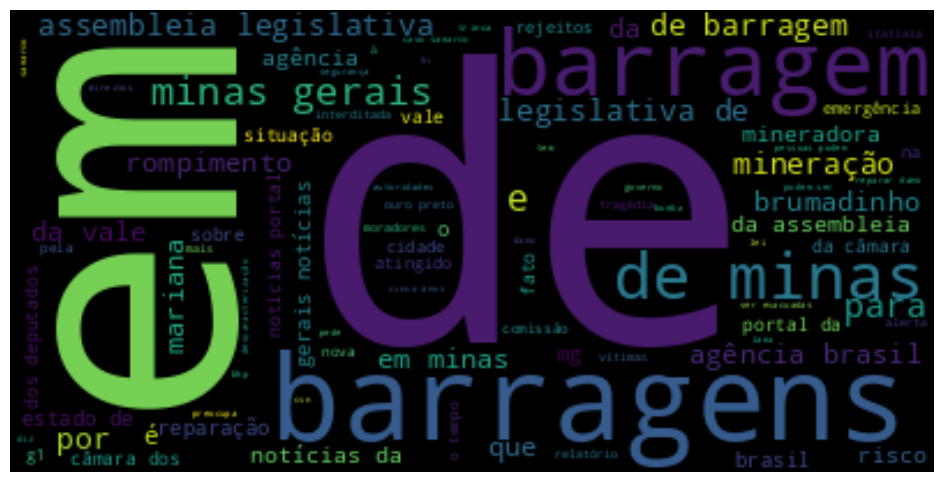

In [ ]:
texto_noticias = " ".join(i for i in noticias_barragem['Titulo'])
wordcloud = WordCloud(background_color='black').generate(texto_noticias)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
noticias_barragem[noticias_barragem['Titulo'].str.contains('assembleia legislativa')]

,Titulo,Data de Publicação,Link,Canal
13,rompimento de barragens destrói saúde física e...,"Wed, 08 Nov 2023 08:00:00 GMT",https://news.google.com/rss/articles/CBMibGh0d...,Notícias da Assembleia Legislativa de Minas
19,autoridades e movimentos sociais querem políti...,"Wed, 06 Dec 2023 08:00:00 GMT",https://news.google.com/rss/articles/CBMijgFod...,Notícias da Assembleia Legislativa de Minas
24,almg e ministério público promovem ações para ...,"Mon, 25 Mar 2024 07:00:00 GMT",https://news.google.com/rss/articles/CBMiiAFod...,Notícias da Assembleia Legislativa de Minas
25,assembleia realiza ato em homenagem às vítimas...,"Tue, 23 Jan 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMieWh0d...,Notícias da Assembleia Legislativa de Minas
26,situação de barragens da inb em caldas preocup...,"Fri, 22 Sep 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMib2h0d...,Notícias da Assembleia Legislativa de Minas
34,barragens não estariam preparadas para efeitos...,"Wed, 04 Oct 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMiiAFod...,Notícias da Assembleia Legislativa de Minas
36,assembleia avalia perigo de eventos climáticos...,"Tue, 03 Oct 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMigAFod...,Notícias da Assembleia Legislativa de Minas
58,barragem de rejeitos radioativos preocupa comi...,"Wed, 09 Aug 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMiXWh0d...,Notícias da Assembleia Legislativa de Minas
90,roberto cidade pede esclarecimentos sobre 14 b...,"Fri, 02 Jun 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMijwFod...,Assembleia Legislativa do Amazonas
94,mineração provoca adoecimento e medo em barão ...,"Tue, 16 May 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMibmh0d...,Notícias da Assembleia Legislativa de Minas


In [ ]:
noticias_barragem[noticias_barragem['Titulo'].str.contains('minas gerais')]

,Titulo,Data de Publicação,Link,Canal
1,operação integrada do governo de minas promove...,"Mon, 29 Apr 2024 20:30:00 GMT",https://news.google.com/rss/articles/CBMigQFod...,Agência Minas Gerais
8,barragens em minas gerais têm risco alto de ro...,"Tue, 12 Dec 2023 08:00:00 GMT",https://news.google.com/rss/articles/CBMibWh0d...,VEJA
10,coluna | as barragens de mineração | brasil de...,"Wed, 18 Oct 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMiWWh0d...,Brasil de Fato - Minas Gerais
13,rompimento de barragens destrói saúde física e...,"Wed, 08 Nov 2023 08:00:00 GMT",https://news.google.com/rss/articles/CBMibGh0d...,Notícias da Assembleia Legislativa de Minas
14,minas gerais regulamenta diretrizes para imple...,"Wed, 10 Jan 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMiQ2h0d...,Único - o portal de notícias do Mattos Filho
15,governo de minas cobra providências de empresa...,"Fri, 05 Apr 2024 07:00:00 GMT",https://news.google.com/rss/articles/CBMifmh0d...,Agência Minas Gerais
16,seminário discute reparação de atingidos por r...,"Thu, 02 Nov 2023 13:55:30 GMT",https://news.google.com/rss/articles/CBMif2h0d...,Portal da Câmara dos Deputados
17,nova técnica para reduzir disposição de rejeit...,"Fri, 20 Oct 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMiiAFod...,Agência Minas Gerais
20,vale (vale3) atualiza situação de barragem de ...,"Wed, 10 Apr 2024 07:00:00 GMT",https://news.google.com/rss/articles/CBMiTGh0d...,Suno Notícias
22,minas gerais ainda tem 38 barragens a montante...,"Wed, 28 Feb 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMilQFod...,G1


In [ ]:
noticias_barragem[noticias_barragem['Titulo'].str.contains('brumadinho')]

,Titulo,Data de Publicação,Link,Canal
31,famílias das vítimas pedem punição para respon...,"Wed, 06 Mar 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMiemh0d...,Portal da Câmara dos Deputados
51,brumadinho é a cidade que mais concentra confl...,"Fri, 26 Jan 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMidGh0d...,Agência Brasil
53,5 anos de brumadinho: o que foi feito desde o ...,"Thu, 25 Jan 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMic2h0d...,Investnews
59,delegado da pf diz que vale mentiu em simulaçã...,"Wed, 24 Jan 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMieGh0d...,Agência Brasil
63,debatedores cobram punição por rompimento da b...,"Mon, 23 Oct 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMifGh0d...,Senado Federal
68,municípios atingidos por rompimento da barrage...,"Wed, 02 Aug 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMimAFod...,Agência Minas Gerais
71,"com tratamento adequado, água de rio afetado p...","Wed, 14 Jun 2023 07:00:00 GMT",https://news.google.com/rss/articles/CBMivgFod...,Unesp - Universidade Estadual Paulista
75,"cinco anos depois, brumadinho sente os efeitos...","Mon, 15 Jan 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMiiQFod...,Correio Braziliense
79,"nos cinco anos da tragédia de brumadinho, nada...","Fri, 12 Jan 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMiYGh0d...,ConJur
84,barragem de brumadinho: 75% dos rejeitos foram...,"Fri, 12 Jan 2024 08:00:00 GMT",https://news.google.com/rss/articles/CBMihgFod...,Estado de Minas
